# Bounding Box Example

In [ ]:
import earthkit.data

request = {
    "class": "od",
    "stream" : "enfo",
    "type" : "pf",
    "date" : -1,  # Note: date must be within the last two days
    "time" : "0000",
    "levtype" : "sfc",
    "expver" : "0001", 
    "domain" : "g",
    "param" : "164/166/167/169",
    "number" : "1",
    "step": "0",
    "feature" : {
        "type" : "boundingbox",
        "points" : [[53.55, 2.76], [50.66, 7.86]],
	},
}


ds = earthkit.data.from_source("polytope", "ecmwf-mars", request, stream=False, address='polytope.ecmwf.int')

## Convert to xarray

In [4]:
da = ds.to_xarray()
da

<xarray.Dataset> Size: 81kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 1258)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2024-11-13T00:00:00Z'
  * number     (number) int64 8B 1
  * steps      (steps) int64 8B 0
  * points     (points) int64 10kB 0 1 2 3 4 5 ... 1252 1253 1254 1255 1256 1257
    x          (points) float64 10kB 50.72 50.72 50.72 ... 53.53 53.53 53.53
    y          (points) float64 10kB 2.877 3.037 3.197 3.357 ... 7.4 7.572 7.744
    z          (points) float64 10kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    tcc        (datetimes, number, steps, points) float64 10kB 0.9396 ... 1.0
    10v        (datetimes, number, steps, points) float64 10kB -1.797 ... -0....
    2t         (datetimes, number, steps, points) float64 10kB 278.3 ... 279.3
    ssrd       (datetimes, number, steps, points) float64 10kB 0.0 0.0 ... 0.0
Attributes:
    class:          od
    Forecast date:  2024-11-13T00:00:00Z
    domain:         g
    expver:         0001
    levtype:        sfc
    number:         1
    step:           0
    stream:         enfo
    type:           pf
    date:           2024-11-13T00:00:00Z

## Visualise

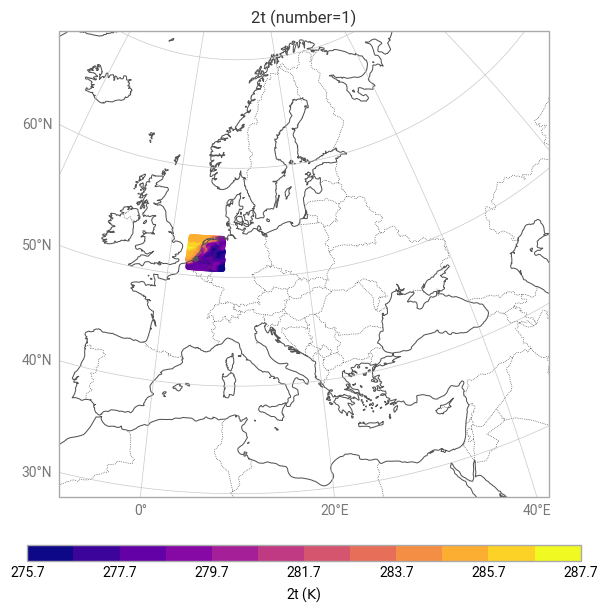

In [5]:
da = ds.to_xarray()
import earthkit.plots
chart = earthkit.plots.Map(domain="Europe")
chart.point_cloud(da['2t'], x="y", y="x")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()